<a href="https://colab.research.google.com/github/doi-shigeo/KMITL-CE-Programming3/blob/main/Programming3_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SciPy 
## Introduction
SciPy is a collection of useful library for Python. https://scipy.org/

SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.

It extends NumPy providing additional tools for array computing and provides specialized data structures, such as sparse matrices and k-dimensional trees.

There are some discussions about the namespace (official abbreviation) of SciPy, however, there is no official abbreviation of SciPy :-). https://stackoverflow.com/questions/36014733/official-abbreviation-for-import-scipy-as-sp-sc



In [ ]:
import scipy

For computer engineer, Linear Algebra (includes vector and matrix) is the key to understand and develop algorithms.


## Useful algorithms

### Dijkstra's algorithm

Theoretical explanation of the algorithm will be in later subject :-), however it is efficient to find a shortest path in a graph. A graph is represented as a set of **nodes** and **links(edges)**. A link indicates the association between two nodes. You can define "direction" as required.

Graph representation is as follows: Left one is an example of a directed graph, and right one is an example of a undirected graph.

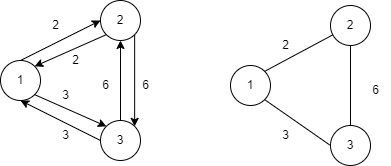

A graph can be modeled using a matrix. The number of rows and  the number of columns must be matched. 
Each row indicates the **source** node and each column indicates the **destination** node. For example, the distance matrix is represented as follows: 

$
A= (a_{ij}) = 
\begin{pmatrix}
0 & 2 & 3 \\
2 & 0 & 6 \\
3 & 6 & 0 \\
\end{pmatrix}
$

Each element in the matrix indicates "distance" between the source to the destination.

$ A = (a_{ij}) $ represents the distance from $ i $ (source) to $ j $ (destination). $i$ corresponds to the position of row and $j$ corresponds to the position of column. the element of value $ 0 $ means the distance is 0 because the source and the distance is same.
This graph is symmetric, however, you can consider an asymmetric graph by defining the different value between $ a_{ij} $ and $ a_{ji}$.

In this case, if move from 3 to 2 (or opposite), the cost is 6 if you choose the direct route. however, the cost is 5 (< 6) if you choose the route consisting of 3 to 1 (the cost is 3) and 1 to 2 (the cost is 2). 

Dijkstra's algorithm can find the shortest path if all elements in a matrix are more than 0.

When defining a matrix and there is no link between two nodes, you can set the biggest value in the matrix.

Once a matrix of a graph is given, you can find the shortest path by Dijkstra's algorithm.






In [ ]:
import numpy as np
from scipy.sparse.csgraph import dijkstra

# the graph has 3 nodes and 3 links (undirected)
# 1 <-> 2: 2
# 1 <-> 3: 3
# 2 <-> 3: 6
distance_matrix = np.array([[0, 1, 3], 
                            [1, 0, 6], 
                            [3, 6, 0]])

# element at row 2 column 3, and at row 3 column 2 are replaced with the shortest value 
scipy.sparse.csgraph.dijkstra(distance_matrix)


array([[0., 1., 3.],
       [1., 0., 4.],
       [3., 4., 0.]])

### Practice: Modeling a graph into the matrix
A graph is given as follows:

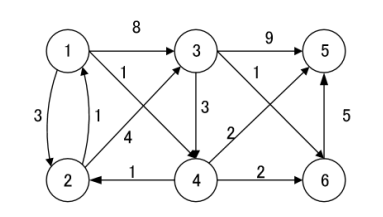

Make a matrix to model the graph above and find the shortest path from node 1 to node 6.
The cost from a node to another is shown over a link. Once you model a graph into matrix, you can easily solve and find the shortest path.

For example, the cost from node 1 to node 2 is 3, the cost from node 2 to node 1 is 1, and the cost from node 1 to node 4 is 1, respectively. 

### Practice: Find combination of the cheapest ticket 

(This practice is for 5th year student in Tomakomai College)

JR (Japanese Railway) train fare from a station to another in Japan is almost proportional to the distance between the stations.
However, if there is a competitor (such as a private railway company) of JR, the fare may be reduced to compete with the private railway company.

When considering the case that you get on the train from Yokohama to Tokyo, there are some competitors (such as "Keikyu" and "Tokyu") around the Tokyo-Kanagawa metropolitan region.

The order of stations from Yokohama to Tokyo is as follows:
Yokohama(よこはま 横浜) -> Kawasaki(かわさき 川崎) -> Shinagawa(しながわ 品川) -> Shinbashi(しんばし 新橋) -> Tokyo(とうきょう 東京), the order refers to Ueno-Tokyo line (うえの とうきょう らいん 上野東京ライン) in Tokyo metropolitan.

There are several stations between Yokohama and Tokyo. Modeling the fare between two stations is as follows (This table shows the fares of buying tickets):

From | To | Fare(JPY)
-|-|-
Yokohama | Kawasaki | 220
Yokohama | Shinagawa | 300
Yokohama | Shinbashi | 480
Yokohama | Tokyo | 480
Kawasaki | Shinagawa | 220
Kawasaki | Shinbashi | 310
Kawasaki | Tokyo | 310
Shinagawa | Shinbashi | 160 
Shinagawa | Tokyo | 170
Shinbashi | Tokyo | 140

Find the cheapest price from Yokohama to Tokyo using Dijkstra's algorithm.



In [ ]:
import numpy as np
import scipy
from scipy.sparse.csgraph import dijkstra


array([[  0., 220., 300., 460., 470.],
       [220.,   0., 220., 310., 310.],
       [300., 220.,   0., 160., 170.],
       [460., 310., 160.,   0., 140.],
       [470., 310., 170., 140.,   0.]])

Slide the bar to enter the cheapest price from Yokohama to Tokyo.

In [ ]:
#@title Cheapest Price (Slide the bar)

cheapest_price = 390 #@param {type: "slider", min: 0, max: 1000, step: 10}



### Practice (Group work): Pick up 6 cities in Thailand and find the "shortest" path

The "cost" can be modeled in a graph is up to each group. For example,
- the time (to move between two points)
- the fare (to move between two points) 
- the distance (to move between two points)
- the amount of CO$ _2 $ emitted (to move between two points)
- up to your idea

6 cities are as folows:
- Bangkok
- Phuket
- Chiang Mai
- Udon Thani
- Hat Yai
- Ubon Ratchathani

Make a graph for two indexes, such as cost and time.

Modeling a actual problem is a key to solve a social problem. To solve by a computer, modeling is necessary.

1. Model the points and costs
2. Make a matrix to represent a model
3. Solve the problem

---

### Tone generation and generate autio output as a wav file

Fourier Transformation is a kind of conversion between time domain and frequency domain. You'll learn mathematical basis in applied mathematics.
Once you do a fourier transformation, you can convert a signal in time domain into frequency domain.

The sound contains only frequency of 440Hz.
https://www.youtube.com/watch?v=ISA4IT3nU_o

Sounds are represented as a summation of sine waves of various frequency, even 
you listen to the music by a famous musician.

To embed an audio inside of Jupyter Notebook, 
```
IPython.display.Audio(y, rate = SAMPLING_RATE, autoplay=True) 
```
The first argument is the signal, the second is sampling rate, the last is to enable autoplay (if not specified, it indicates `autoplay=False`)

If you want to generate an output file, 
```
from scipy.io.wavfile import write

# snip

write("440Hz.wav", SAMPLING_RATE, y.astype(np.float32))

```
where first argument is output filename, second is sampling rate, the last is data to output. you can specify `numpy.float32`, `numpy.int32`, `numpy.int16`, `numpy.int8`. See also (description of write function): https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html

Once you find the output, download the file '440Hz.wav' and play it on your laptop or tablet.


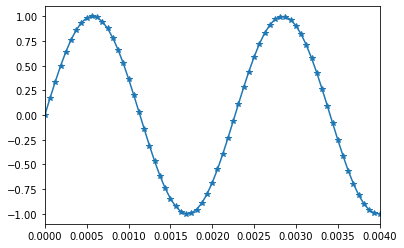

In [ ]:
import numpy as np
import IPython.display
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
%matplotlib inline

FREQ = 440 # A(ラ)
SAMPLING_RATE = 16000 
DURATION = 1

x = np.linspace(0, DURATION, DURATION * SAMPLING_RATE)
y = np.sin(FREQ * 2 * np.pi * x)

plt.xlim(0, 0.004)
plt.plot(x, y, marker="*") # show graph
plt.show() 

IPython.display.Audio(y, rate = SAMPLING_RATE, autoplay=True) # to show as an embedded audio
write("440Hz.wav", SAMPLING_RATE, y.astype(np.float32))

To mix the signals with different frequency, you can just add each signal. 
As a result, you cah hear the harmonized sound.

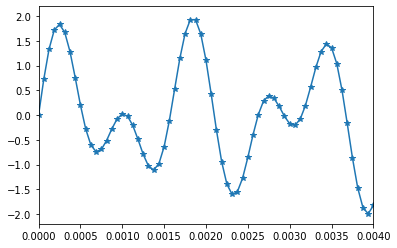

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display
from scipy.io.wavfile import write

FREQ1 = 697 
FREQ2 = 1209
SAMPLING_RATE = 16000 
DURATION = 1

x = np.linspace(0, DURATION, DURATION * SAMPLING_RATE)
y = np.sin(FREQ1 * 2 * np.pi * x) + np.sin(FREQ2 * 2 * np.pi * x)

plt.xlim(0, 0.004)
plt.plot(x, y, marker="*") # show graph
plt.show() 

write("697_1209Hz.wav", SAMPLING_RATE, y.astype(np.float32))

IPython.display.Audio(y, rate = SAMPLING_RATE, autoplay=True) # to show as an embedded audio


To play C-D-E-F-G-A-B-C, you can join the sounds.
the key is `concatenete`, which joins two NumPy array.
Please beware `(` and `)` are twice when calling. 
(it means that it passes the argument as a tuple)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display
from scipy.io.wavfile import write

FREQ_TUPLE = (261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25)
SAMPLING_RATE = 16000 # points per second
DURATION = 1

out = np.array([]) # empty NumPy array

x = np.linspace(0, DURATION, DURATION * SAMPLING_RATE)

for freq in FREQ_TUPLE:
  y = np.sin(freq * 2 * np.pi * x)
  out = np.concatenate((out, y)) # beware the opening and closing parentheses are twice

write("CDEFGABC.wav", SAMPLING_RATE, out.astype(np.float32))

IPython.display.Audio(out, rate = SAMPLING_RATE, autoplay=True) # to show as an embedded audio


### Practice: DTMF (Dual Tone Multi Frequency signaling)

As you type with a keypad on your phone, you can hear the sound of typing. This sound is a standardalized in ITU-T. 
https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling

DTMF keypad frequency is as follows

||1209 Hz|1336 Hz|1477 Hz|1633 Hz|
|:-:|:-:|:-:|:-:|:-:|
|697Hz | 1 | 2 | 3 | A | 
|770Hz | 4 | 5 | 6 | B | 
|852Hz | 7 | 8 | 9 | C | 
|941Hz | * | 0 | # | D | 

Make a program to play a DTMF tone sound.
- make a program to play sound with the order of "1", "2", "3", "4", "5", "6", "7", "8", "9" and "0". Please ignore other keys (A, B, C, D, *, #)

Notice: you don't have to draw a graph of playing sound.


### Fast Fourier Transformation

Fast Fourier Transformation is a technique to convert a signal in **a time domain** into a signal in **a frequency domain** or opposite. (Now, you don't have to understand it, but you can see a signal with different view)

You can do a Fourier Transformation with NumPy, here we introduce Fourier Transformation with SciPy.

To convert a signal into frequency domain, you call the function `fftpack.fft(signal)`.  After converting into frequency domain, it has "amplitude" part and "phase" part.



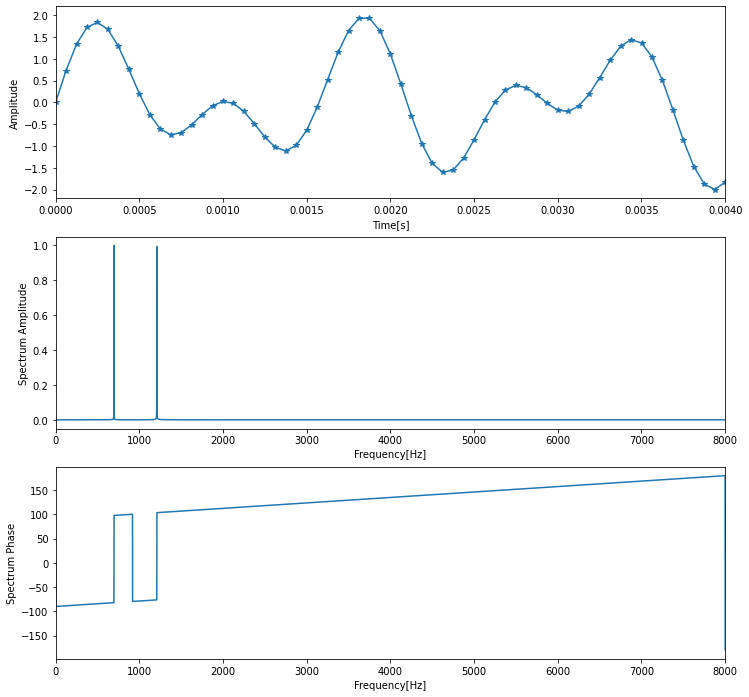

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import IPython.display
from scipy.io.wavfile import write
%matplotlib inline

FREQ1 = 697 
FREQ2 = 1209
SAMPLING_RATE = 16000 
DURATION = 1

x = np.linspace(0, DURATION, DURATION * SAMPLING_RATE)
y = np.sin(FREQ1 * 2 * np.pi * x) + np.sin(FREQ2 * 2 * np.pi * x)

# FFT by SciPy 
spectrum = fftpack.fft(y) # spectrum: complex number

# Get amplitude of the signal (normalized by |y| / 2)
amp = np.sqrt((spectrum.real ** 2) + (spectrum.imag ** 2)) 
amp /= len(y) / 2    
freq = np.linspace(0, SAMPLING_RATE, len(y))

# Get phase
phase = np.arctan2(spectrum.imag, spectrum.real)               
phase = np.degrees(phase)   

# draw graph
fig, ax = plt.subplots(3, 1)

ax[0].set_xlim(0, 0.004)
ax[0].set_xlabel("Time[s]")
ax[0].set_ylabel("Amplitude")
ax[0].plot(x, y, marker="*")

ax[1].set_xlim(0, SAMPLING_RATE / 2)
ax[1].set_xlabel("Frequency[Hz]")
ax[1].set_ylabel("Spectrum Amplitude")
ax[1].plot(freq, amp)
fig.set_size_inches(12, 12)

ax[2].set_xlim(0, SAMPLING_RATE / 2)
ax[2].set_xlabel("Frequency[Hz]")
ax[2].set_ylabel("Spectrum Phase")
ax[2].plot(freq, phase)

plt.show()

### Read wave file and display frequency domain of the wave

Many audio file formats are available. One of the easiest format to handle is wave (whose extension is .wav generally) file.

You can read a wave file by calling a function, `scipy.io.wavfile.read`.
Reference to the function is here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
This function takes two arguments, you usually don't have to use the last arguments.

This function returns two arguments: First is sample rate and second is raw wave data.


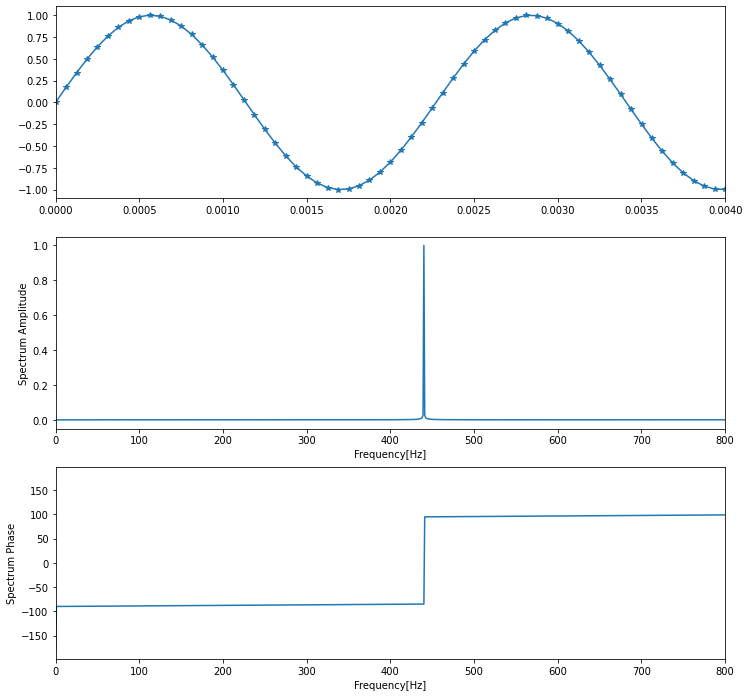

In [ ]:
from scipy.io import wavfile
import scipy.io
import numpy as np
from scipy import fftpack

# Before runnning the program, create "440Hz.wav" by running the above program.
samplerate, data = wavfile.read("440Hz.wav")

length = data.shape[0] / samplerate

time = np.linspace(0., length, data.shape[0])
#plt.plot(time, data, label="Monoral channel")

spectrum = fftpack.fft(data) # spectrum: complex number

# Get amplitude of the signal (normalized by |y| / 2)
amp = np.sqrt((spectrum.real ** 2) + (spectrum.imag ** 2)) 
amp /= len(data) / 2    
freq = np.linspace(0, SAMPLING_RATE, len(data))

# Get phase
phase = np.arctan2(spectrum.imag, spectrum.real)               
phase = np.degrees(phase)   

# draw graph
fig, ax = plt.subplots(3, 1)

fig.set_size_inches(12,12)

ax[0].set_xlim(0, 0.004)
ax[0].plot(time, data, marker="*", label="Monoral channel")

#ax[1].set_xlim(0, SAMPLING_RATE / 2)
ax[1].set_xlim(0, 800)
ax[1].set_xlabel("Frequency[Hz]")
ax[1].set_ylabel("Spectrum Amplitude")
ax[1].plot(freq, amp)

#ax[2].set_xlim(0, SAMPLING_RATE / 2)
ax[2].set_xlim(0, 800)
ax[2].set_xlabel("Frequency[Hz]")
ax[2].set_ylabel("Spectrum Phase")
ax[2].plot(freq, phase)

plt.show()

#plt.plot(time, data[:, 0], label="Left channel")
#plt.plot(time, data[:, 1], label="Right channel")



Using several wave files to handle, you can use the following code
When trying to the example, you must put wave files into the folder "wave". 

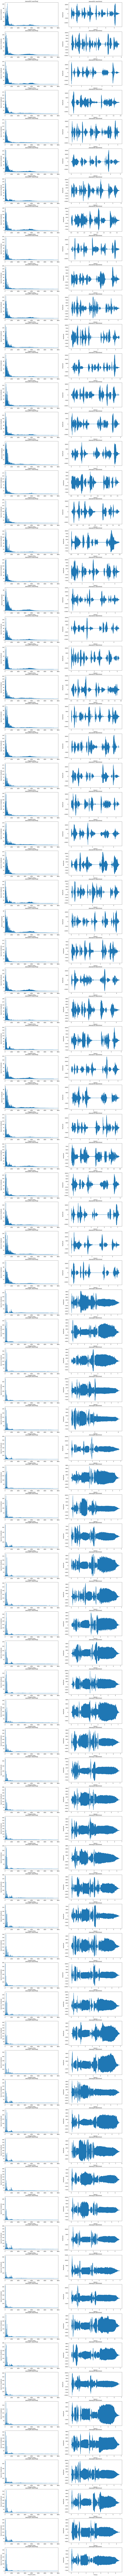

In [ ]:
# from os.path import dirname, join as pjoin # function 'join' is also a built-in function, so it avoids conflict of function name.
from scipy.io import wavfile
import scipy.io
import numpy as np
from scipy import fftpack
import glob

wavs = glob.glob("./wave/*.wav")

fig, ax = plt.subplots(len(wavs), 2)
fig.set_size_inches(20, 450)

for i, wav in enumerate(sorted(wavs)):
    #print(i, wav)
    samplerate, data = wavfile.read(wav)
    length = data.shape[0] / samplerate
    time = np.linspace(0., length, data.shape[0])
    spectrum = fftpack.fft(data) 
    amp = np.sqrt((spectrum.real ** 2) + (spectrum.imag ** 2)) 
    amp /= len(data) / 2    
    freq = np.linspace(0, SAMPLING_RATE, len(data))
    ax[i][0].set_xlim(0, 8000)
    ax[i][0].set_title(wav + "(freq)")
    ax[i][0].set_xlabel("Frequency[Hz]")
    ax[i][0].set_ylabel("Spectrum Amplitude")
    ax[i][0].plot(freq, amp)
    ax[i][1].set_title(wav + "(time)")
    ax[i][1].set_xlabel("Time[s]")
    ax[i][1].set_ylabel("Amplitude")
    ax[i][1].plot(time, data)


    


# Count how many wave files are in a folder
#data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')


### Practice: Fast Fourier Transformation with different sound

1. Please prepare a wave file by yourself.
2. Using Fast Fourier Transformation and draw a "Spectrum Amplitude" graph of the wave file.

Notice: Please don't violate copyright of the wave file.